In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\Data Science Bootcamp\ML\Case Study\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Mapping for binary categorical variables
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [8]:
# Define the mapping for the 'region' column
region_mapping = {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}
df['region'] = df['region'].map(region_mapping)

# Display the modified dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting the numerical columns for scaling
numerical_cols = ['age', 'bmi', 'children', 'charges']

# Standardization
scaler_standard = StandardScaler()
df[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

# Normalization
scaler_minmax = MinMaxScaler()
df[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

# Display the first few rows of the standardized and normalized data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,1,0.251611
1,0.000000,1,0.479150,0.2,0,2,0.009636
2,0.217391,1,0.458434,0.6,0,2,0.053115
3,0.326087,1,0.181464,0.0,0,3,0.333010
4,0.304348,1,0.347592,0.0,0,3,0.043816


# Exploratory Data Analysis (EDA)

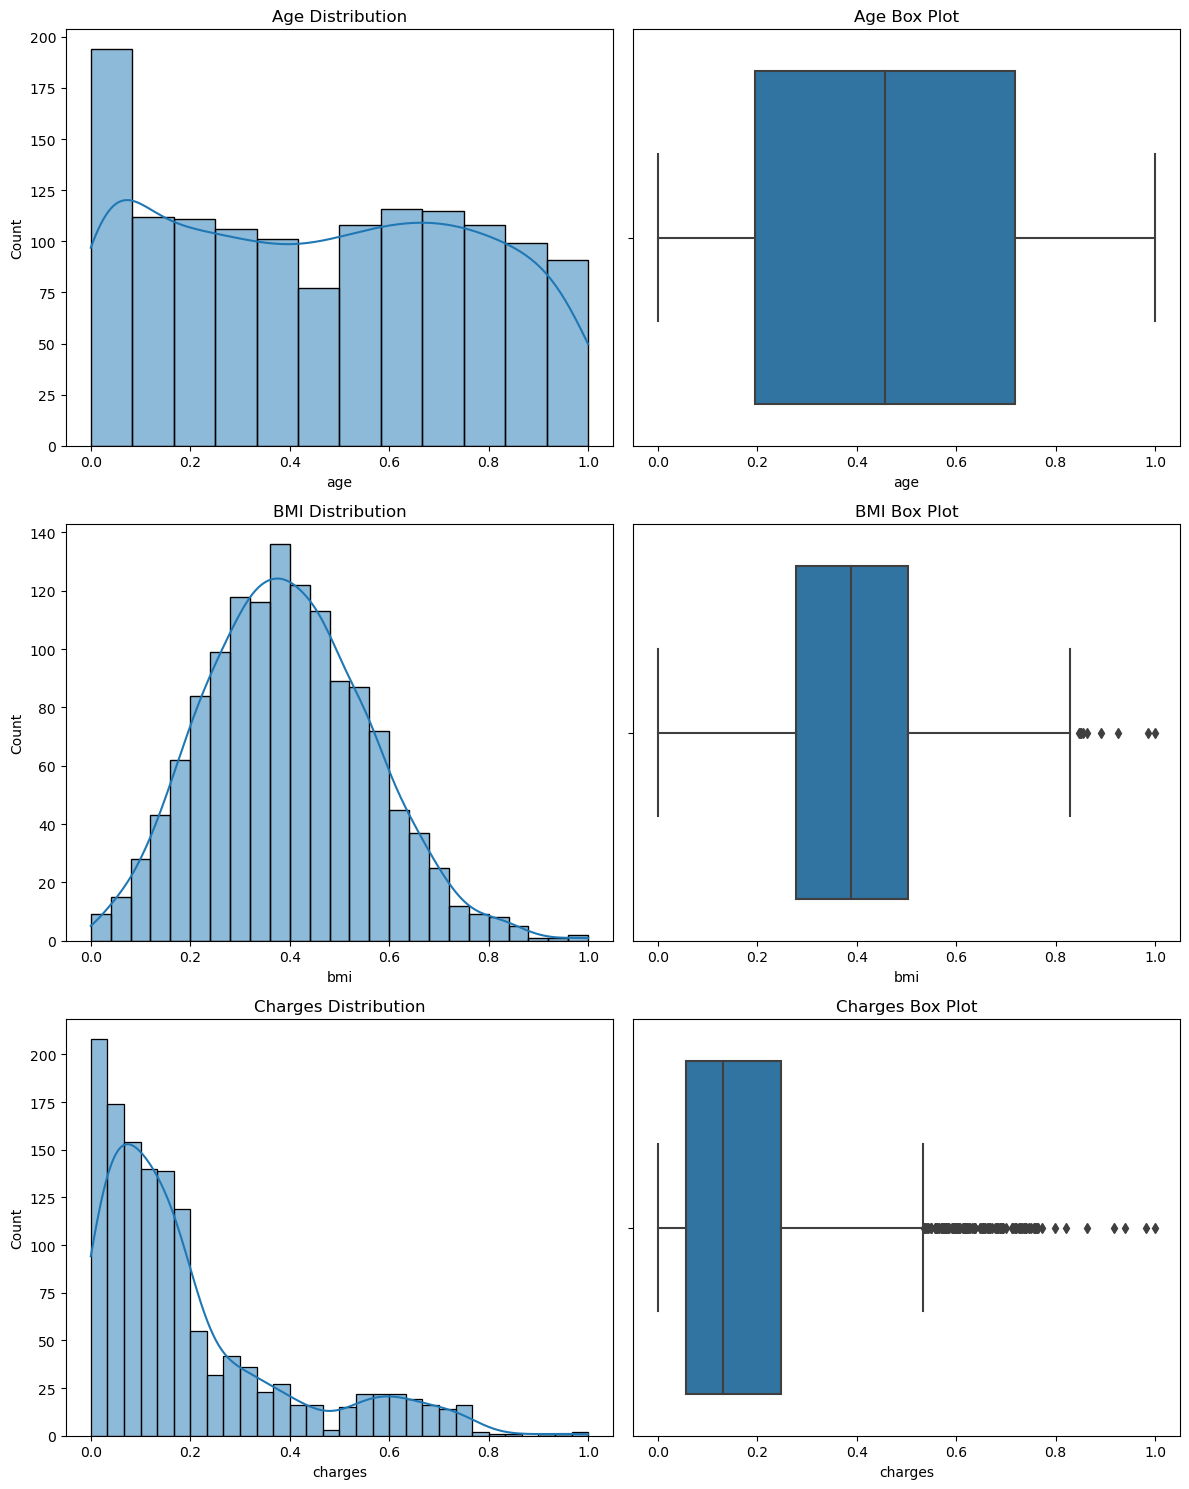

In [10]:
# Plotting the histograms and box plots for the key variables
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Histograms
sns.histplot(df['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')
sns.histplot(df['bmi'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('BMI Distribution')
sns.histplot(df['charges'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Charges Distribution')

# Box plots
sns.boxplot(x=df['age'], ax=axs[0, 1])
axs[0, 1].set_title('Age Box Plot')
sns.boxplot(x=df['bmi'], ax=axs[1, 1])
axs[1, 1].set_title('BMI Box Plot')
sns.boxplot(x=df['charges'], ax=axs[2, 1])
axs[2, 1].set_title('Charges Box Plot')

plt.tight_layout()
plt.show()

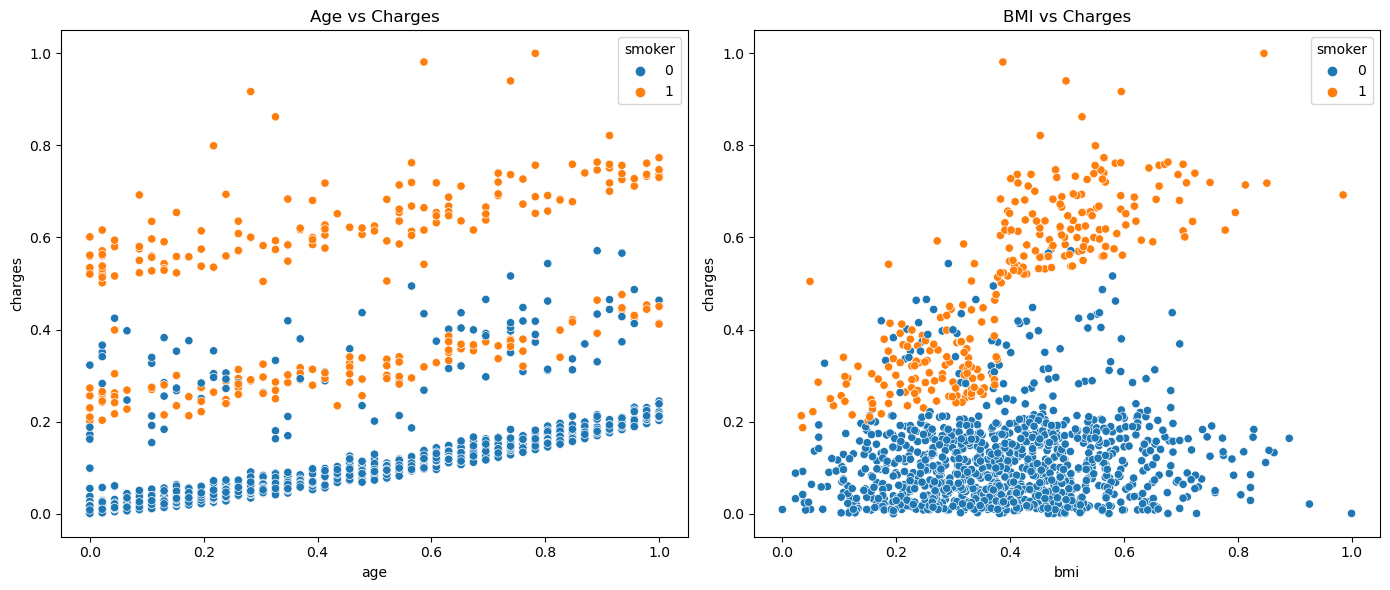

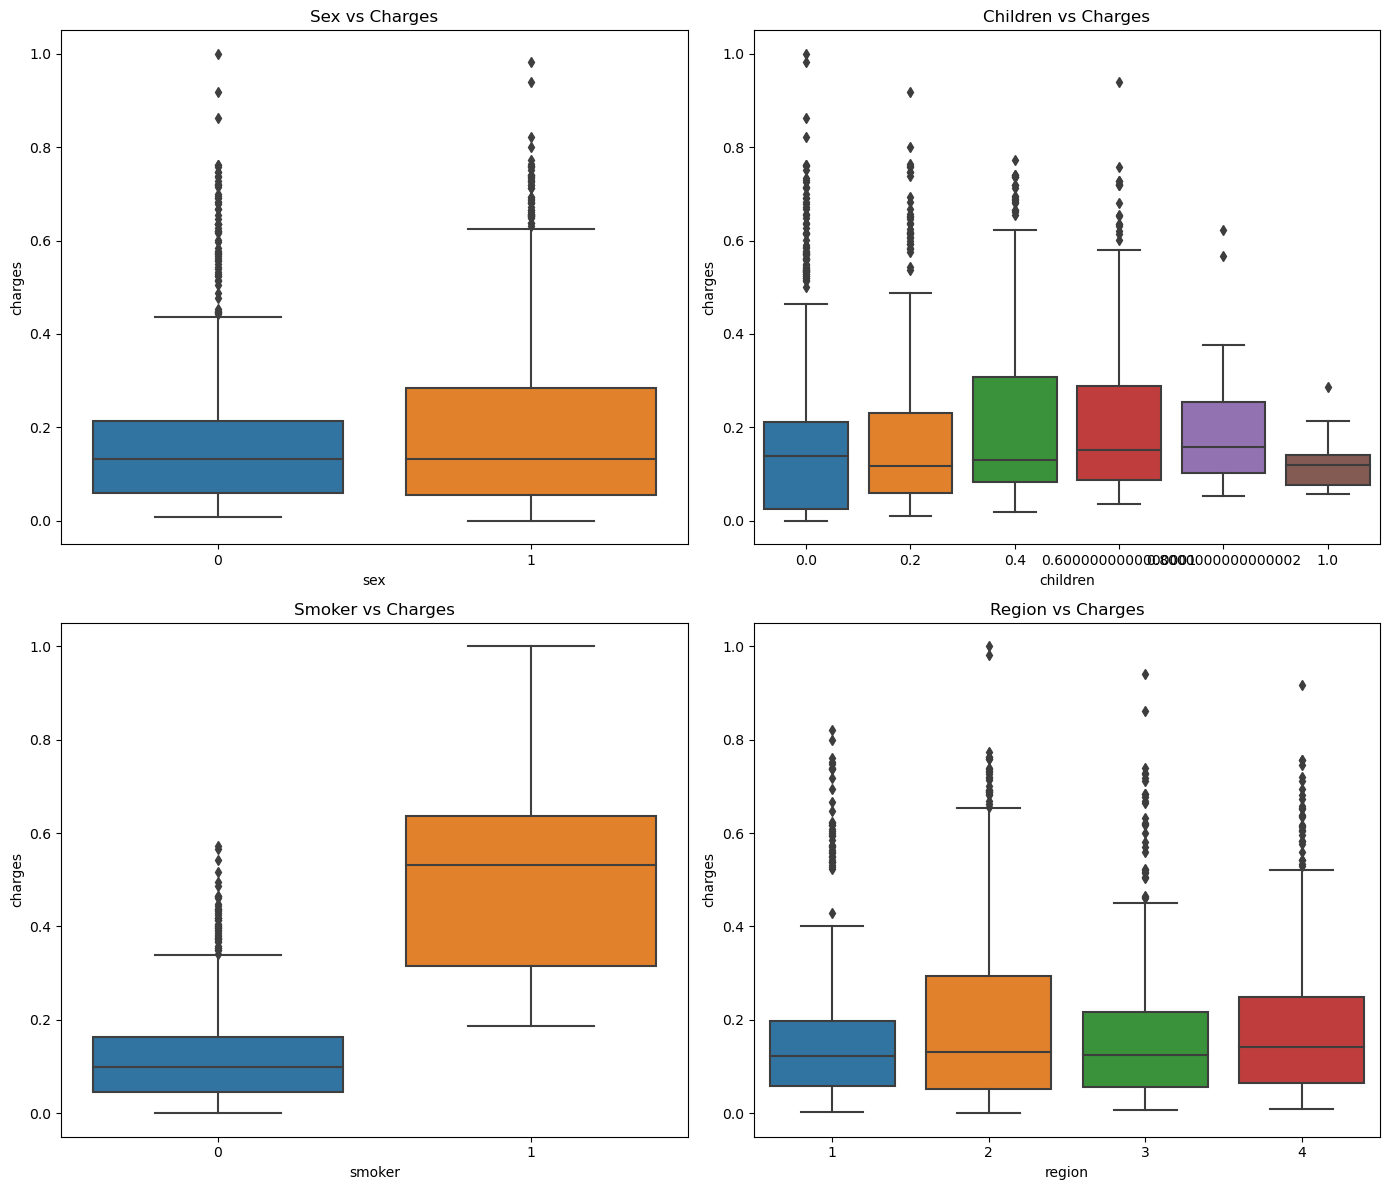

0.2990081933306475 0.19834096883362884


In [11]:
# Visual analysis with scatter plots for continuous features
plt.figure(figsize=(14, 6))

# Scatter plot for 'age' vs 'charges'
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'])
plt.title('Age vs Charges')

# Scatter plot for 'bmi' vs 'charges'
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
plt.title('BMI vs Charges')

plt.tight_layout()
plt.show()

# Box plots for categorical features
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Box plot for 'sex' vs 'charges'
sns.boxplot(x=df['sex'], y=df['charges'], ax=axs[0, 0])
axs[0, 0].set_title('Sex vs Charges')

# Box plot for 'children' vs 'charges'
sns.boxplot(x=df['children'], y=df['charges'], ax=axs[0, 1])
axs[0, 1].set_title('Children vs Charges')

# Box plot for 'smoker' vs 'charges'
sns.boxplot(x=df['smoker'], y=df['charges'], ax=axs[1, 0])
axs[1, 0].set_title('Smoker vs Charges')

# Box plot for 'region' vs 'charges'
sns.boxplot(x=df['region'], y=df['charges'], ax=axs[1, 1])
axs[1, 1].set_title('Region vs Charges')

plt.tight_layout()
plt.show()

# Statistical analysis with correlation coefficients
correlation_age = df['age'].corr(df['charges'])
correlation_bmi = df['bmi'].corr(df['charges'])

print(correlation_age, correlation_bmi)

In [31]:
# Function to detect outliers based on the IQR
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_thresholds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    
    outliers = df[(df[feature] < outlier_thresholds[0]) | (df[feature] > outlier_thresholds[1])]
    return outliers

# Detecting outliers for 'age', 'bmi', and 'charges'
outliers_age = detect_outliers_iqr(df, 'age')
outliers_bmi = detect_outliers_iqr(df, 'bmi')
outliers_charges = detect_outliers_iqr(df, 'charges')

# Displaying potential outliers for each feature
outliers_summary = {
    'age_outliers': outliers_age.shape[0],
    'bmi_outliers': outliers_bmi.shape[0],
    'charges_outliers': outliers_charges.shape[0],
}

outliers_summary, outliers_bmi[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']], outliers_charges[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

({'age_outliers': 0, 'bmi_outliers': 9, 'charges_outliers': 139},
       age  sex    bmi  children  smoker  region      charges
 116    58    1  49.06         0       0       2  11381.32540
 286    46    0  48.07         2       0       4   9432.92530
 401    47    1  47.52         1       0       2   8083.91980
 543    54    0  47.41         0       1       2  63770.42801
 847    23    1  50.38         1       0       2   2438.05520
 860    37    0  47.60         2       1       1  46113.51100
 1047   22    1  52.58         1       1       2  44501.39820
 1088   52    1  47.74         1       0       2   9748.91060
 1317   18    1  53.13         0       0       2   1163.46270,
       age  sex     bmi  children  smoker  region      charges
 14     27    1  42.130         0       1       2  39611.75770
 19     30    1  35.300         0       1       1  36837.46700
 23     34    0  31.920         1       1       4  37701.87680
 29     31    1  36.300         2       1       1  38711.0000

# Model Development

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Define the features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-Squared: ", r2)
print("Mean Squared Error: ", mse)

R-Squared:  0.7833463107364538
Mean Squared Error:  0.008569826799446196


In [15]:
# Assuming 'model' is your trained LinearRegression model

# Extracting the coefficients of the model
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

# Displaying the coefficients
coefficients.sort_values(by='Coefficient', ascending=False)


,Coefficient
smoker,0.377468
bmi,0.199222
age,0.188745
children,0.033927
region,0.004330
sex,-0.000300


Smoker status has the highest positive coefficient (0.377468), suggesting that being a smoker has a strong positive influence on the outcome being predicted.

BMI (Body Mass Index) has a positive coefficient of 0.199222, indicating that higher BMI is associated with a positive effect on the outcome.

Age has a positive coefficient of 0.188745, implying that older individuals have a positive impact on the outcome.

The number of children (children) has a positive, but much smaller coefficient of 0.033927, indicating a weaker influence.

Region has a very small positive coefficient of 0.004330, suggesting a minimal impact.

Sex has a very small negative coefficient of -0.000300, implying a minor negative influence.